In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sim.oscillators import Oscillator

In [2]:
%matplotlib inline

In [12]:
class Oscillator(object):
    amp = [10.0, 1.0, 0.5, 0.1]
    frq = [np.pi * 1.0, np.pi * 2.0, np.pi * 3.0, np.pi * 4.0]
    nos = [0.4, 0.1, 0.05, 0.01]
    drop_prob = 0.05

    def __init__(self, span=0.5, spacing=0.01,
                 add_noise=False, drops=False):
        self.t = 0
        self.nsteps = int(span / spacing)
        self.spacing = spacing
        self.add_noise = add_noise
        self.drops = drops
        self.times, self.d1, self.d2, self.d3, self.d4, self.dT = [], [], [], [], [], []
        for i in range(self.nsteps):
            self._add_data_point()
            self.t = self.t + self.spacing

    def _add_data_point(self):
        if len(self.times) >= self.nsteps:
            for a in [self.times, self.d1, self.d2, self.d3, self.d4, self.dT]:
                a.pop(0)
        self.times.append(self.t)
        raw_vs = []
        nos_vs = []
        for i, a in enumerate([self.d1, self.d2, self.d3, self.d4]):
            raw_vs.append(Oscillator.amp[i] * np.cos(Oscillator.frq[i] * self.t))
            nos_vs.append(Oscillator.nos[i] * np.random.randn())
            if self.drops and np.random.random() < Oscillator.drop_prob:
                a.append(0.0)
            else:
                a.append(raw_vs[-1] + nos_vs[-1] if self.add_noise else 0.0)
        self.dT.append(sum(raw_vs))

    def step(self):
        self._add_data_point()
        self.t = self.t + self.spacing

    def ts(self):
        return np.asarray(self.times)

    def d1s(self):
        return np.asarray(self.d1)

    def d2s(self):
        return np.asarray(self.d2)

    def d3s(self):
        return np.asarray(self.d3)

    def d4s(self):
        return np.asarray(self.d4)
    
    def dts(self):
        return np.asarray(self.d1) + np.asarray(self.d2) \
            + np.asarray(self.d3) + np.asarray(self.d4)
    
    def dTs(self):
        return np.asarray(self.dT)

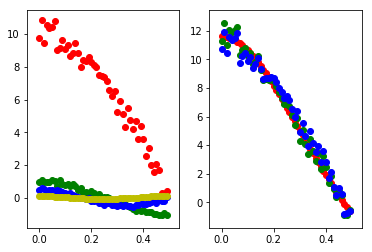

In [26]:
osc = Oscillator(add_noise=True, drops=False)
fig = plt.Figure()
gs = plt.GridSpec(1, 2)
ax1 = plt.subplot(gs[0])
ax1.scatter(osc.ts(), osc.d1s(), c='r')
ax1.scatter(osc.ts(), osc.d2s(), c='g')
ax1.scatter(osc.ts(), osc.d3s(), c='b')
ax1.scatter(osc.ts(), osc.d4s(), c='y')
ax2 = plt.subplot(gs[1])
ax2.scatter(osc.ts(), osc.dTs(), c='r')
ax2.scatter(osc.ts(), osc.dts(), c='g')
ax2.scatter(osc.ts(), osc.d1s() + osc.d2s(), c='b')
plt.show()

-0.04073818478180937 0.03014557469823923


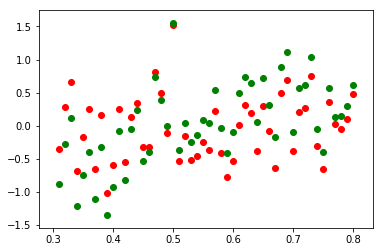

-0.024265450300506187 0.0564629445098082


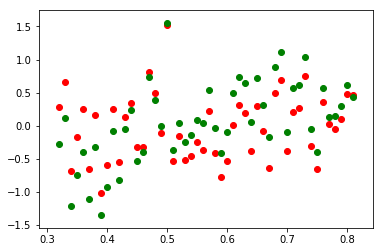

-0.04105446892601755 0.051807499167376925


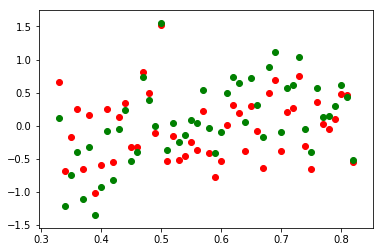

-0.04756237661847473 0.053782785309993614


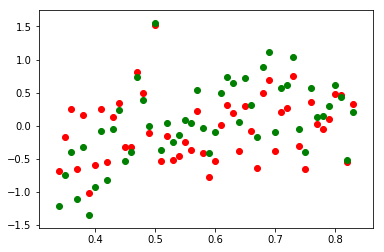

-0.021055219892381478 0.09036107489533432


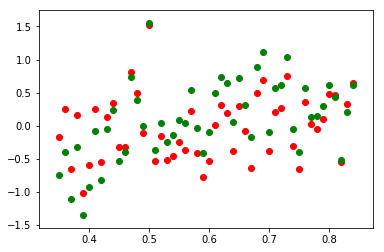

-0.014957882182304547 0.10466286645661847


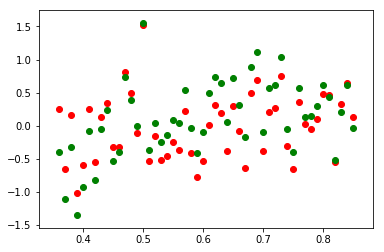

-0.027547093233646965 0.10169283743465582


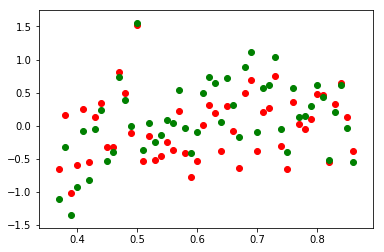

-0.02002516356958091 0.11493198862560529


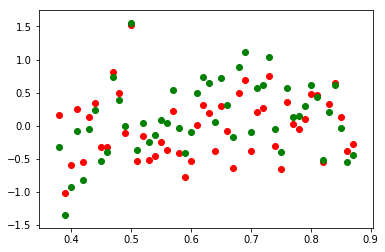

-0.03415726072998411 0.1057058391693185


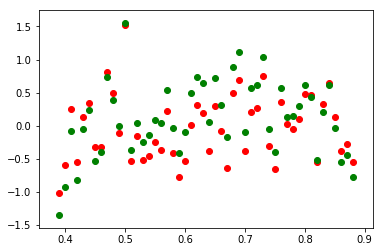

-0.0009411724900047203 0.1406882124690728


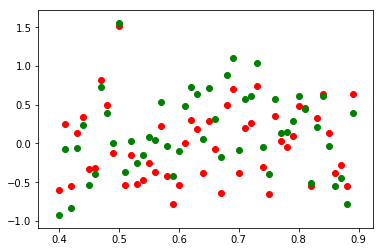

In [30]:
for _ in range(10):
    osc.step()
    plt.scatter(osc.ts(), osc.dTs() - (osc.d1s() + osc.d2s() + osc.d3s() + osc.d4s()), c='r')
    plt.scatter(osc.ts(), osc.dTs() - (osc.d1s() + osc.d2s()), c='g')
    print(np.mean(osc.dTs() - (osc.d1s() + osc.d2s() + osc.d3s() + osc.d4s())),
          np.mean(osc.dTs() - (osc.d1s() + osc.d2s())))
    plt.show()